In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('http://taanila.fi/winequality-red.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [29]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
X = df['alcohol'].to_frame()

y = df['quality']

In [5]:
from sklearn.linear_model import LinearRegression

malli = LinearRegression()
malli.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
malli.coef_ #Kulmakerroin

array([0.36084177])

In [7]:
malli.intercept_

1.8749748869971525

In [8]:
malli.score(X,y)

0.22673436811275482

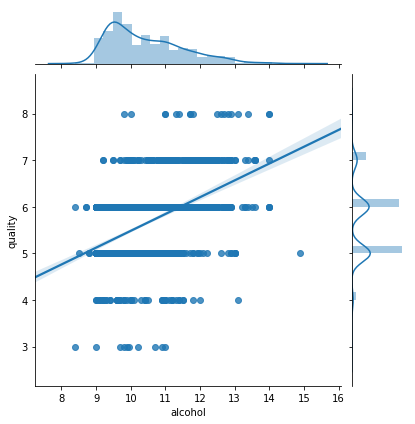

In [9]:
sns.jointplot(data=df, x= 'alcohol', y= 'quality', kind='reg')

In [10]:
malli.predict(pd.DataFrame([10, 11, 12, 13, 14]))

array([5.48339254, 5.84423431, 6.20507607, 6.56591784, 6.9267596 ])

In [21]:
df1 = df[['density', 'residual sugar', 'total sulfur dioxide', 'free sulfur dioxide', 'fixed acidity', 'quality']]
df1.head()

,density,residual sugar,total sulfur dioxide,free sulfur dioxide,fixed acidity,quality
0,0.9978,1.9,34.0,11.0,7.4,5
1,0.9968,2.6,67.0,25.0,7.8,5
2,0.9970,2.3,54.0,15.0,7.8,5
3,0.9980,1.9,60.0,17.0,11.2,6
4,0.9978,1.9,34.0,11.0,7.4,5


Text(0.5, 0.98, 'Wine attributes')

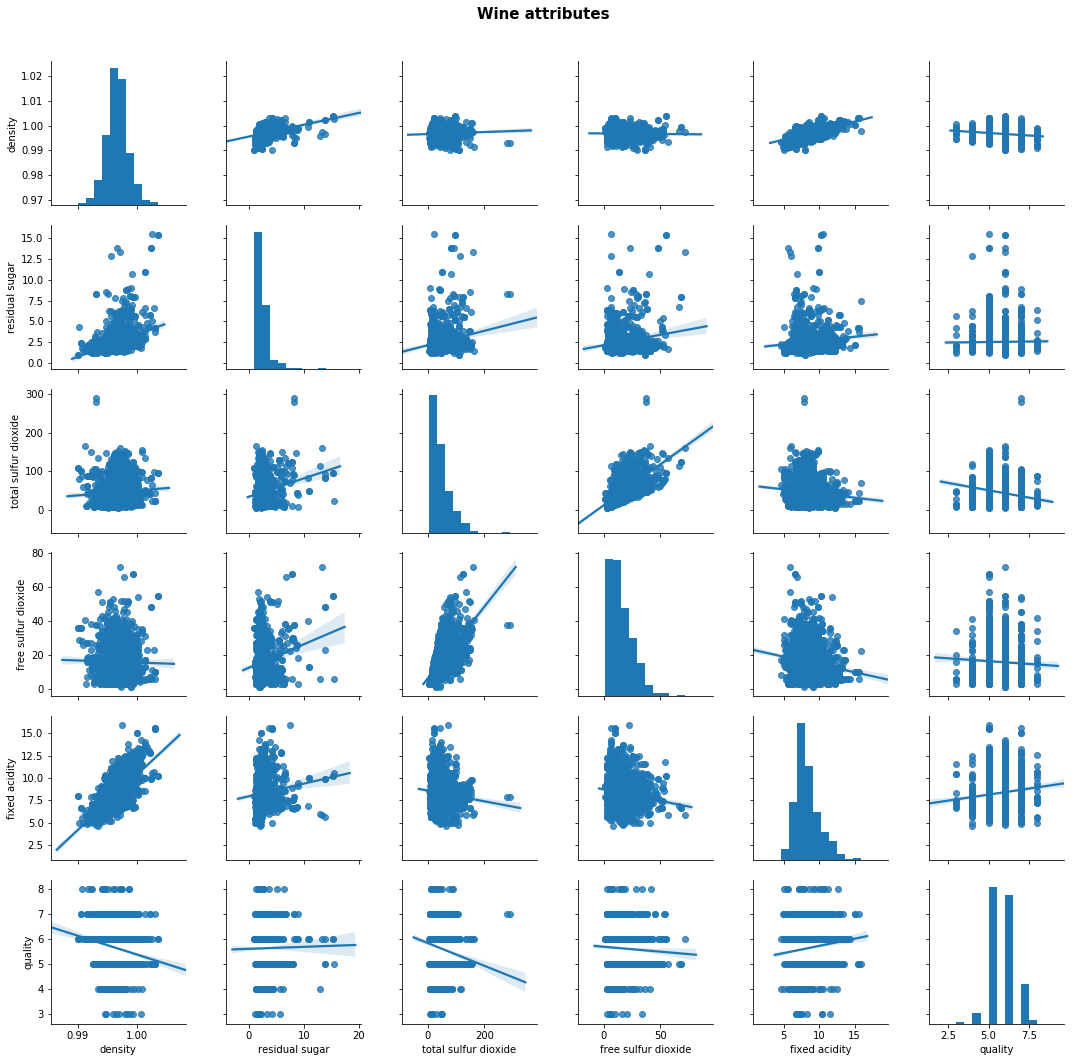

In [22]:
pp= sns.pairplot(df1, kind = 'reg')
pp.fig.subplots_adjust(top=0.93, wspace=0.3)
pp.fig.suptitle('Wine attributes', fontsize= 15, fontweight='bold')

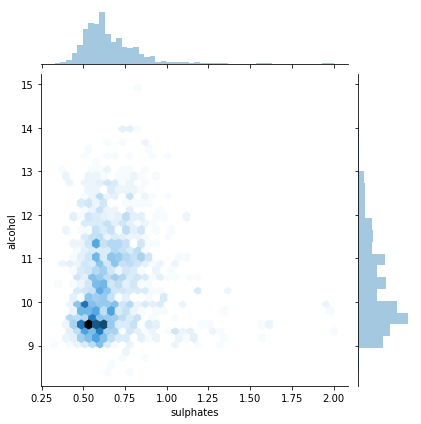

In [24]:
sns.jointplot(data=df, x= 'sulphates', y= 'alcohol', kind='hex')

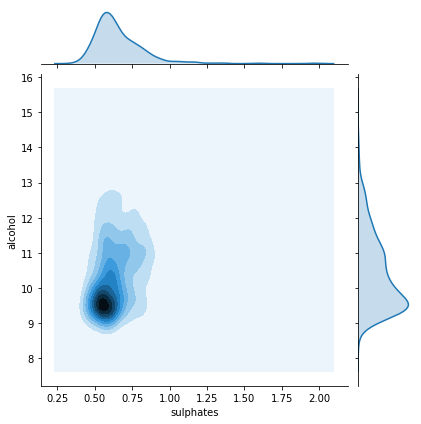

In [26]:
sns.jointplot(data=df, x= 'sulphates', y= 'alcohol', kind='kde')

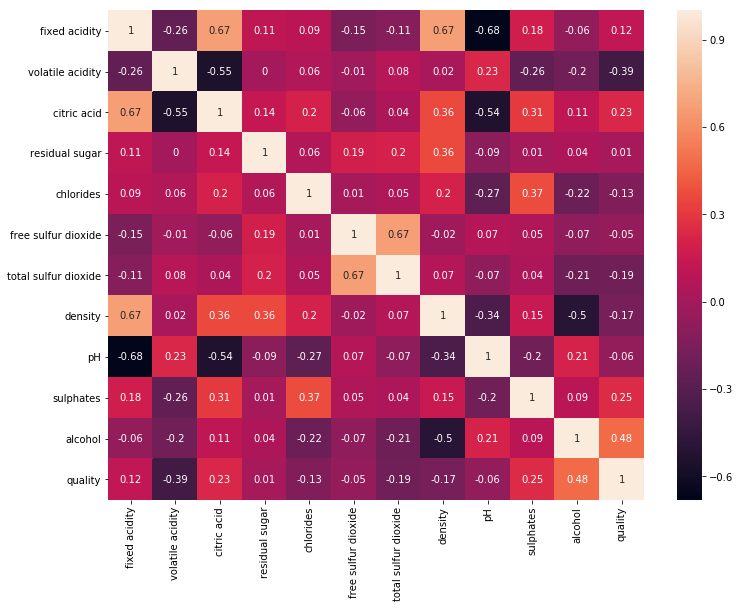

In [45]:
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(12,9))
sns.heatmap(data=correlation_matrix, annot=True)
#Suurimmat korrelaatiot laadun kanssa ovat alchol ja volatile acidityllä

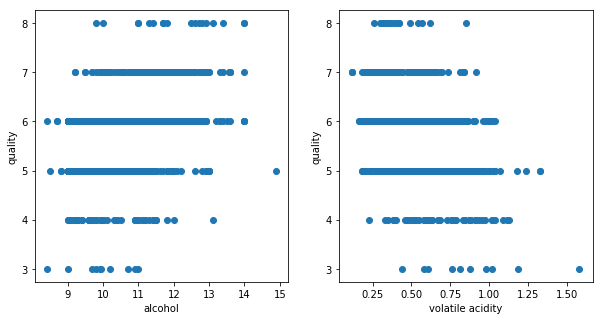

In [49]:
features = ['alcohol', 'volatile acidity']

target = df['quality']

plt.figure(figsize=(10,5))
for i, feature in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    plt.scatter(df[feature], target)
    plt.xlabel(feature)
    plt.ylabel('quality')

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 4)
(320, 4)
(1279,)
(320,)


In [51]:
malli = LinearRegression()
malli.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
malli.intercept_

5.261610443030585

In [53]:
malli.coef_

array([ 0.        ,  0.03175278,  0.05709093, -0.00402292])

In [54]:
from sklearn.metrics import mean_squared_error

y_train_predict = malli.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = malli.score(X_train,y_train)

print('Mallin sopivuus opetusdataan')
print("--------------------------------------")
print('Keskivirhe: {}'.format(rmse))
print('Selityskerroin: {}'.format(r2))
print("\n")

y_test_predict = malli.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = malli.score(X_test, y_test)

print('Mallin sopivuus testidataan')
print('--------------------------------------')
print('Keskivirhe: {}'.format(rmse))
print('Selityskerroin: {}'.format(r2))

Mallin sopivuus opetusdataan
--------------------------------------
Keskivirhe: 0.7880591640431222
Selityskerroin: 0.04814721402597144


Mallin sopivuus testidataan
--------------------------------------
Keskivirhe: 0.792149581125344
Selityskerroin: 0.03308858341718879


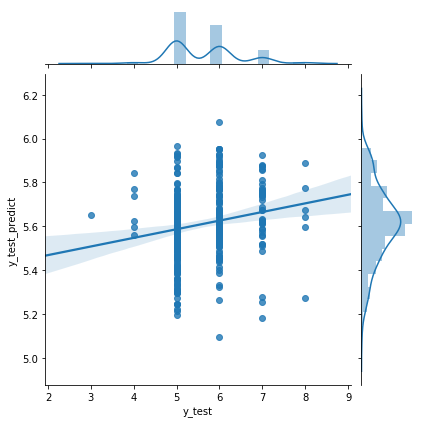

In [55]:
test = pd.DataFrame()
test['y_test'] = y_test
test['y_test_predict'] = y_test_predict

sns.jointplot(data=test, x='y_test',y='y_test_predict',kind='reg')